Nama Anggota : 	
1. Ade Pratama Hidayat 		(2301946455) 	20%	
2. Putri Aliyyah 			(2301938434)	20%
3. Ninda Setyowati			(2602231816)	20%
4. Kaleb Leadro Pandapotan		(2602231083)	20%
5. Yoga Prasetya			(2301878170)	20%

In [ ]:
#Import beberapa library yang diperlukan
import numpy as np #untuk melakukan perhitungan saintifik
import pandas as pd #untuk manipulasi dan mengolah data
import matplotlib.pyplot as plt #untuk visualisasi data
import seaborn as sns #untuk visualisasi data
sns.set_theme(color_codes=True) #memberikan garis kotak dalam seaborn supaya membaca grafik lebih mudah

In [ ]:
#membaca dataset menggunakan pandas
df=pd.read_csv("Shopping_CustomerData.csv")
df.head()

CustomerID CustomerGender  CustomerAge CustomerCity  AnnualIncome  \
0        1001           Male           49    Bengaluru  527547.58850   
1        1002           Male           59    Bengaluru  207143.19760   
2        1003         Female           54        Delhi  164423.84570   
3        1004         Female           42    Bengaluru   56220.36443   
4        1005         Female           30    Bengaluru  256194.36190   

   CreditScore  SpendingScore  CustomerCityID  
0          653             78               1  
1          630             63               1  
2          555             69               4  
3          699             30               1  
4          793              6               1

#Menentukan atribut yang akan dijadikan sebagai bahan clustering

In [ ]:
#Data Clustering, disini saya memilih atribut Credit Score dan Spending Score untuk clustering
X=df[["CreditScore","SpendingScore"]]

#Variabel untuk clustering
X.head()

CreditScore  SpendingScore
0          653             78
1          630             63
2          555             69
3          699             30
4          793              6

In [ ]:
#Mengimport K-Means
from sklearn.cluster import KMeans
#Membagi cluster menjadi 3 daerah dan random state untuk mengatur keacakan data agar konsisten hasilnya
km1=KMeans(n_clusters=3, random_state=0)
#memasukkan atribut patokan clustering dalam K-Means
km1.fit(X)
y=km1.predict(X)
#Membuat label yang menentukan cluster setiap customer
df["cluster"] = y
df.head()

CustomerID CustomerGender  CustomerAge CustomerCity  AnnualIncome  \
0        1001           Male           49    Bengaluru  527547.58850   
1        1002           Male           59    Bengaluru  207143.19760   
2        1003         Female           54        Delhi  164423.84570   
3        1004         Female           42    Bengaluru   56220.36443   
4        1005         Female           30    Bengaluru  256194.36190   

   CreditScore  SpendingScore  CustomerCityID  cluster  
0          653             78               1        1  
1          630             63               1        1  
2          555             69               4        1  
3          699             30               1        2  
4          793              6               1        0

Print Customer Setiap Cluster

In [ ]:
df_cluster0 = df[df['cluster'].astype('str').str.contains('0')]
df_cluster0.head()

CustomerID CustomerGender  CustomerAge CustomerCity  AnnualIncome  \
4         1005         Female           30    Bengaluru   256194.3619   
6         1007         Female           45      Chennai   186352.3482   
7         1008         Female           23       Mumbai   414233.1569   
15        1016           Male           53      Kolkata   342386.7743   
17        1018           Male           30       Mumbai   243054.5171   

    CreditScore  SpendingScore  CustomerCityID  cluster  
4           793              6               1        0  
6           881              2               2        0  
7           852             77               5        0  
15          880             36               3        0  
17          803             49               5        0

In [ ]:
df_cluster0 = df[df['cluster'].astype('str').str.contains('1')]
df_cluster0.head()

CustomerID CustomerGender  CustomerAge CustomerCity  AnnualIncome  \
0        1001           Male           49    Bengaluru   527547.5885   
1        1002           Male           59    Bengaluru   207143.1976   
2        1003         Female           54        Delhi   164423.8457   
5        1006         Female           38      Chennai   475324.8903   
9        1010         Female           48      Kolkata   179271.2332   

   CreditScore  SpendingScore  CustomerCityID  cluster  
0          653             78               1        1  
1          630             63               1        1  
2          555             69               4        1  
5          635             97               2        1  
9          669             97               3        1

In [ ]:
df_cluster0 = df[df['cluster'].astype('str').str.contains('2')]
df_cluster0.head()

CustomerID CustomerGender  CustomerAge CustomerCity  AnnualIncome  \
3         1004         Female           42    Bengaluru   56220.36443   
8         1009           Male           59      Chennai   97263.51748   
12        1013         Female           54        Delhi  384549.19600   
14        1015           Male           54    Bengaluru  195955.92110   
16        1017         Female           23    Bengaluru   12396.06128   

    CreditScore  SpendingScore  CustomerCityID  cluster  
3           699             30               1        2  
8           708             22               2        2  
12          711             64               4        2  
14          764             53               1        2  
16          729             18               1        2

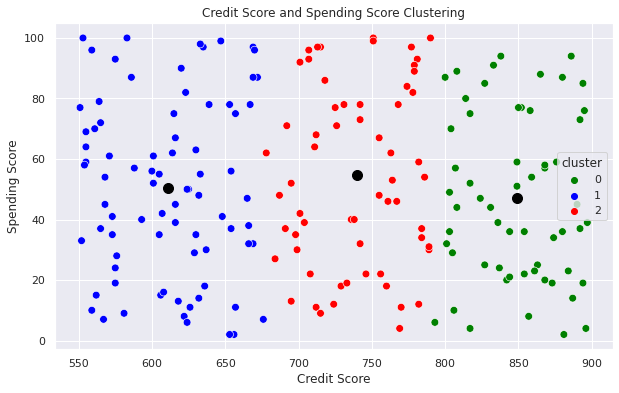

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'CreditScore',y = 'SpendingScore',hue="cluster",  
                 palette=['green','blue','red'], legend='full',data = df,s = 60 )
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Credit Score')
plt.ylabel('Spending Score') 
plt.title('Credit Score and Spending Score Clustering')
plt.show()